<a href="https://colab.research.google.com/github/Midun32/FDSFE_AAdesola/blob/main/CodesInClass/walkingspeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np

In [3]:
import pandas as pd
df= pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/walkingspeed_Bettencourt07.csv", header=None, names=["population", "wspeed", "City"])
df

,population,wspeed,City
0,2520.0,2.28,Itea
1,370.0,2.79,Psychro
2,5650.0,3.37,Netanya
3,14100.0,3.76,Corte
4,23300.0,3.31,Safed
5,52600.0,4.91,Dimona
6,73300.0,4.40,Netanya
7,77100.0,3.90,New Haven
8,145000.0,4.40,Jerusalem
9,320000.0,4.49,Brno


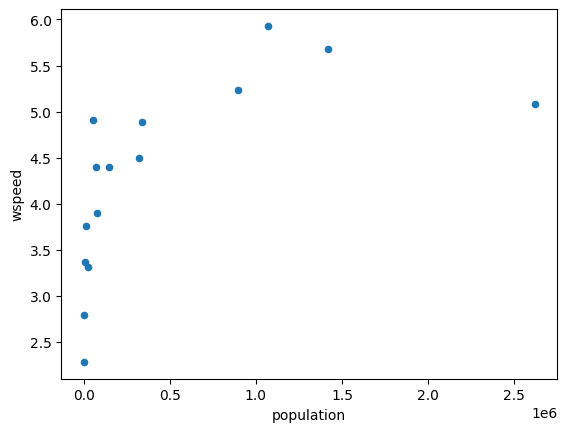

In [4]:
df.plot("population","wspeed", kind="scatter");

In [6]:
df["logpopulation"]=np.log10(df["population"])

In [8]:
df

,population,wspeed,City,logpopulation
0,2520.0,2.28,Itea,3.401401
1,370.0,2.79,Psychro,2.568202
2,5650.0,3.37,Netanya,3.752048
3,14100.0,3.76,Corte,4.149219
4,23300.0,3.31,Safed,4.367356
5,52600.0,4.91,Dimona,4.720986
6,73300.0,4.40,Netanya,4.865104
7,77100.0,3.90,New Haven,4.887054
8,145000.0,4.40,Jerusalem,5.161368
9,320000.0,4.49,Brno,5.505150


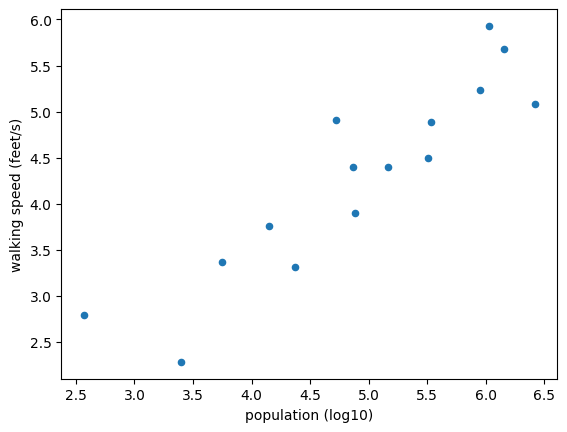

In [10]:
ax = df.plot("logpopulation","wspeed", kind="scatter")
ax.set_xlabel("population (log10)")
ax.set_ylabel("walking speed (feet/s)");

#for plotting only

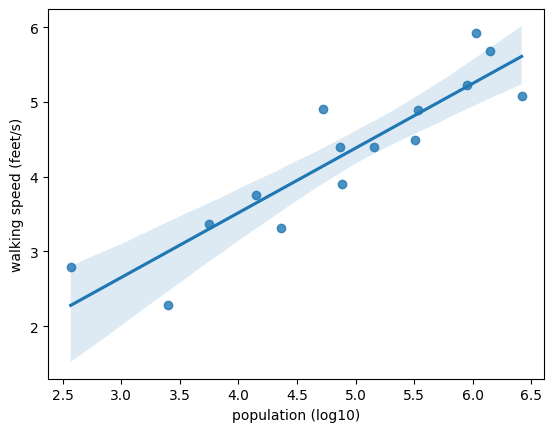

In [12]:
import seaborn as sns
ax=sns.regplot(x=df["logpopulation"], y=df["wspeed"])
ax.set_xlabel("population (log10)")
ax.set_ylabel("walking speed (feet/s)");

(group force minimization)

In [13]:
def sumsqerror(y_true, y_pred):
  """
  """
  return ((y_true-y_pred)**2).sum()

In [14]:
def line(slope, intercept, x):
  return slope * x + intercept

In [15]:
minnow = 1e7
for s in np.arange(0, 3, 0.01):
  for i in np.arange(0, 2, 0.01):
    prediction = line(s,i,df["logpopulation"])
    sse = sumsqerror(df["wspeed"], prediction)
    if sse<minnow:
      minnow=sse
      slope_manual, intercept_manual = s, i
slope_manual, intercept_manual

(0.87, 0.03)

In [17]:
df["prediction_manual"]=line(slope_manual, intercept_manual, df["logpopulation"])

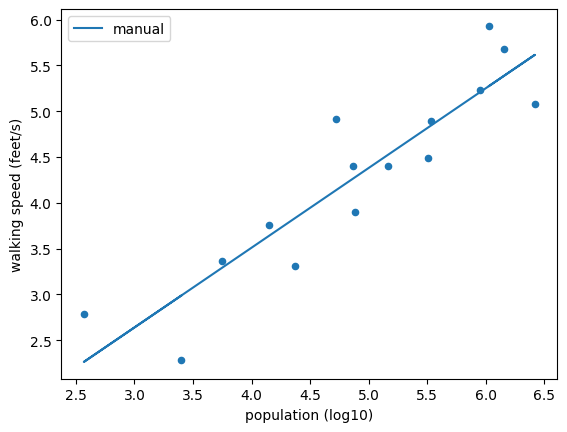

In [34]:
ax = df.plot("logpopulation","wspeed", kind="scatter")
ax.plot(df['logpopulation'], df["prediction_manual"], label="manual")
ax.legend()
ax.set_xlabel("population (log10)")
ax.set_ylabel("walking speed (feet/s)");

In [20]:
# np.polyfit

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linreg = LinearRegression()
# linreg.fit(df["logpopulation"], df['wspeed'])
linreg

LinearRegression()

In [24]:
df["logpopulation"].values.reshape(-1, 1)

array([[3.40140054],
       [2.56820172],
       [3.75204845],
       [4.14921911],
       [4.36735592],
       [4.72098574],
       [4.86510397],
       [4.88705438],
       [5.161368  ],
       [5.50514998],
       [5.53275438],
       [5.95230801],
       [6.41830129],
       [6.15228834],
       [6.02938378]])

In [27]:
linreg.fit(df["logpopulation"].values.reshape(-1,1), df['wspeed'])
linreg.intercept_

0.05664889151453334

In [38]:
df["sklearn_prediction"] = linreg.predict(df["logpopulation"].values.reshape(-1,1))
df["sklearn_prediction"]

0     3.000010
1     2.279012
2     3.303439
3     3.647126
4     3.835888
5     4.141898
6     4.266609
7     4.285603
8     4.522977
9     4.820465
10    4.844352
11    5.207408
12    5.610650
13    5.380458
14    5.274104
Name: sklearn_prediction, dtype: float64

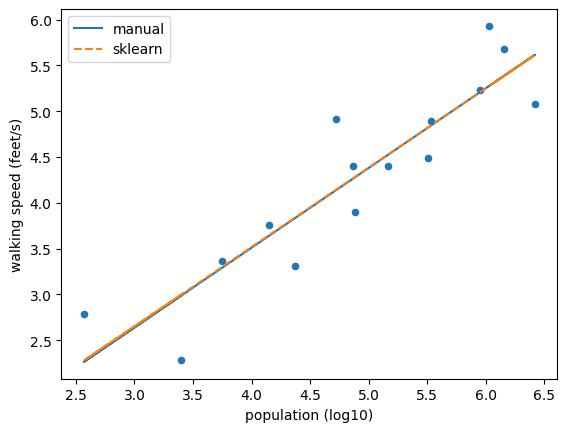

In [39]:
ax = df.plot("logpopulation","wspeed", kind="scatter")
ax.plot(df['logpopulation'], df["prediction_manual"], label="manual")
ax.plot(df['logpopulation'], df["sklearn_prediction"], '--', label="sklearn")
ax.legend()
ax.set_xlabel("population (log10)")
ax.set_ylabel("walking speed (feet/s)");

In [31]:
linreg.score(df["logpopulation"].values.reshape(-1,1), df['wspeed'])

0.8216814457855732